# Plot of density matrices

In this notebook we'll plot the density matrices of the `CIS`, `CID` and `CISD` classes to see if we can locate any patterns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from configuration_interaction import CIS as CI
# from configuration_interaction import CID as CI
# from configuration_interaction import CISD as CI
from configuration_interaction.ci_helper import evaluate_one_body_overlap
from quantum_systems import OneDimensionalHarmonicOscillator

In [2]:
def odho_small():
    n = 2
    l = 12
    grid = 10
    num_grid_points = 401

    odho = OneDimensionalHarmonicOscillator(n, l, grid, num_grid_points)
    odho.setup_system()

    return odho

In [3]:
ci_b = CI(odho_small(), brute_force=True, verbose=True)
ci_b.setup_ci_space()
ci_b.compute_ground_state()

ci = CI(odho_small(), brute_force=False, verbose=True)
ci.setup_ci_space()
ci.compute_ground_state()

Number of states to create: 21
Size of a state in bytes: 8
Time spent setting up CIS space: 0.0069599151611328125 sec
Time spent constructing Hamiltonian: 2.2519760131835938 sec
Time spent diagonalizing Hamiltonian: 0.0030739307403564453 sec
Number of states to create: 21
Size of a state in bytes: 8
Time spent setting up CIS space: 0.0003058910369873047 sec
Time spent constructing Hamiltonian: 2.7003729343414307 sec
Time spent diagonalizing Hamiltonian: 0.0005397796630859375 sec


In [4]:
np.testing.assert_allclose(ci_b.energies, ci.energies)
np.testing.assert_allclose(ci_b.hamiltonian, ci.hamiltonian, atol=1e-12)
np.testing.assert_allclose(ci_b.hamiltonian.real, ci.hamiltonian.real, atol=1e-12)
np.testing.assert_allclose(ci_b.hamiltonian.imag, ci.hamiltonian.imag)
np.testing.assert_allclose(ci_b.states, ci.states)

In [5]:
rho_b = ci_b.compute_one_body_density_matrix()
rho = ci.compute_one_body_density_matrix()

Time spent computing one-body matrix: 0.034332990646362305 sec
Time spent computing one-body matrix: 0.013087272644042969 sec


In [6]:
print(f"Max of rho_b = {np.max(rho_b)}")
print(f"Max of rho   = {np.max(rho)}")
print(f"Norm of rho_b = {np.linalg.norm(rho_b)}")
print(f"Norm of rho   = {np.linalg.norm(rho)}")

Max of rho_b = (0.500077293320685+0j)
Max of rho   = (0.7816680149469861+0j)
Norm of rho_b = 1.0000225275170171
Norm of rho   = 1.3451113623827733


Below we plot the one-body density matrices from both solutions. Note that they are in no way guaranteed to be equal. This is a consequence of differences in the coefficient matrices (eigenvectors) from diagonalization of the CI-Hamiltonian with small perturbations. We will demonstrate below that observables such as the electron density makes more sense to compare, and that these needs to normalized properly (both the coefficients and the single-particle functions).

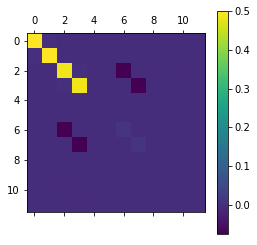

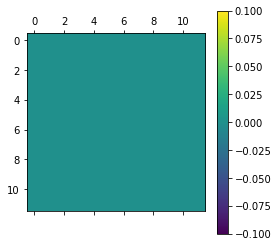

In [7]:
plt.matshow(rho_b.real)
plt.colorbar()
plt.matshow(rho_b.imag)
plt.colorbar()
plt.show()

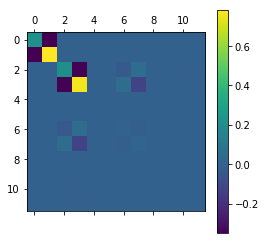

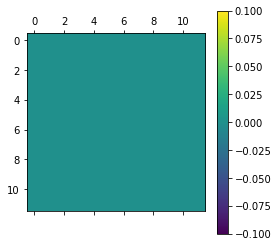

In [8]:
plt.matshow(rho.real)
plt.colorbar()
plt.matshow(rho.imag)
plt.colorbar()
plt.show()

In [9]:
rho_b = ci_b.compute_particle_density(K=0)

Time spent computing one-body matrix: 0.016482114791870117 sec


In [10]:
rho = ci.compute_particle_density(K=0)

Time spent computing one-body matrix: 0.01445913314819336 sec


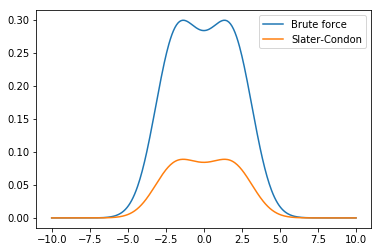

In [11]:
plt.plot(ci_b.system.grid, rho_b.real, label="Brute force")
plt.plot(ci.system.grid, rho.real, label="Slater-Condon")
plt.legend(loc="best")
plt.show()

We now normalize the electron density. The single-particle functions are already normalized correctly, but the coefficients from diagonalization of the Hamiltonian is normalized with respect to the inner product. We compute the unnormalized electron density by
\begin{align}
    \tilde{\rho}(\boldsymbol{r}) = \phi_q^{*}(\boldsymbol{r}) \rho^{q}_{p} \phi_{p}(\boldsymbol{r}),
\end{align}
where $\rho^{q}_{p}$ are the one-body density matrix elements and $\{\phi_p(\boldsymbol{r})\}_{p = 1}^{L}$ are the coordinate representation of the basis functions. The normalized electron density is thus given by
\begin{align}
    \rho(\boldsymbol{r}) = N \frac{\tilde{\rho}(\boldsymbol{r})}{
        \int\text{d}\boldsymbol{r} \tilde{\rho}(\boldsymbol{r})
    },
\end{align}
where $N$ is the number of particles in the system. This yields the normalization
\begin{align}
    \int\text{d}\boldsymbol{r} \rho(\boldsymbol{r}) = N.
\end{align}

Time spent computing one-body matrix: 0.012753009796142578 sec
Time spent computing one-body matrix: 0.005609035491943359 sec


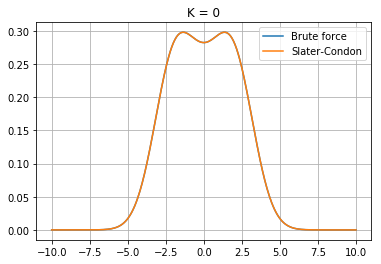

Time spent computing one-body matrix: 0.011497974395751953 sec
Time spent computing one-body matrix: 0.0027070045471191406 sec


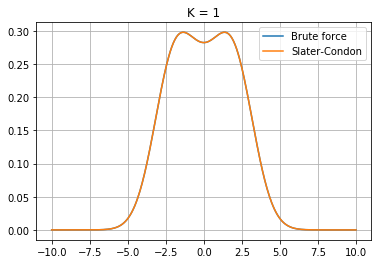

Time spent computing one-body matrix: 0.011427640914916992 sec
Time spent computing one-body matrix: 0.0026197433471679688 sec


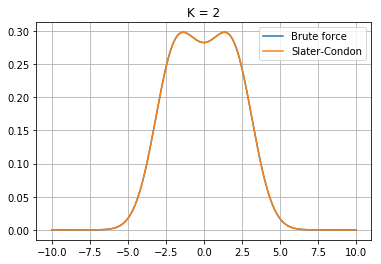

Time spent computing one-body matrix: 0.01126408576965332 sec
Time spent computing one-body matrix: 0.0025742053985595703 sec


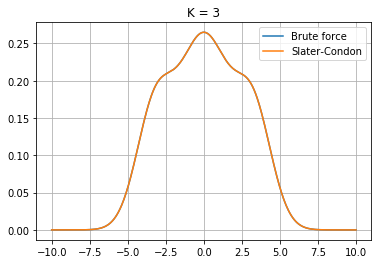

Time spent computing one-body matrix: 0.011729955673217773 sec
Time spent computing one-body matrix: 0.005234956741333008 sec


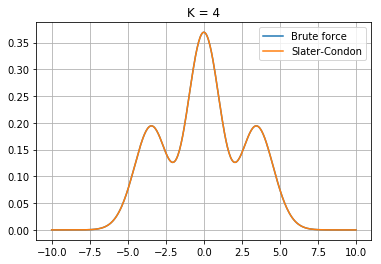

Time spent computing one-body matrix: 0.01119375228881836 sec
Time spent computing one-body matrix: 0.002846956253051758 sec


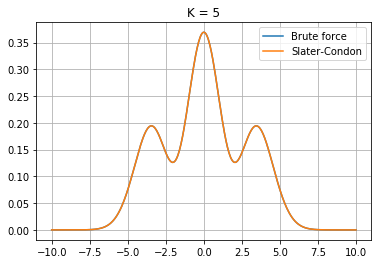

Time spent computing one-body matrix: 0.011229276657104492 sec
Time spent computing one-body matrix: 0.0027379989624023438 sec


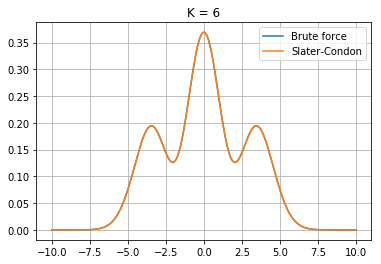

Time spent computing one-body matrix: 0.011716127395629883 sec
Time spent computing one-body matrix: 0.0026428699493408203 sec


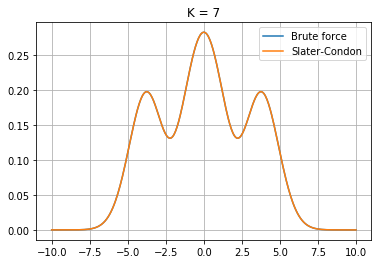

Time spent computing one-body matrix: 0.011337041854858398 sec
Time spent computing one-body matrix: 0.002599000930786133 sec


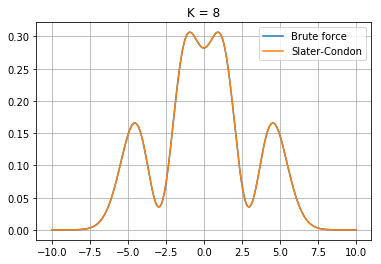

Time spent computing one-body matrix: 0.011522054672241211 sec
Time spent computing one-body matrix: 0.004961967468261719 sec


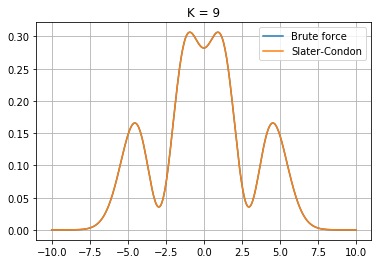

Time spent computing one-body matrix: 0.011699914932250977 sec
Time spent computing one-body matrix: 0.0025920867919921875 sec


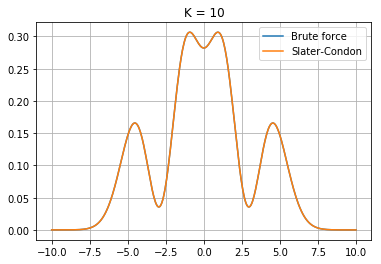

Time spent computing one-body matrix: 0.011503219604492188 sec
Time spent computing one-body matrix: 0.0027070045471191406 sec


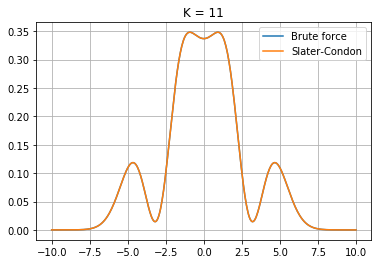

Time spent computing one-body matrix: 0.011259794235229492 sec
Time spent computing one-body matrix: 0.002750396728515625 sec


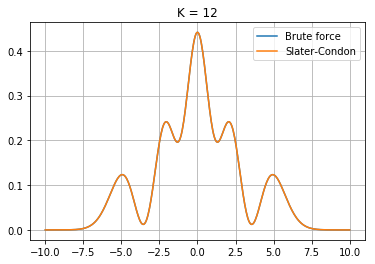

Time spent computing one-body matrix: 0.011223077774047852 sec
Time spent computing one-body matrix: 0.0026140213012695312 sec


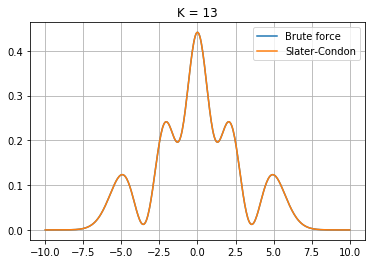

Time spent computing one-body matrix: 0.015855073928833008 sec
Time spent computing one-body matrix: 0.002741098403930664 sec


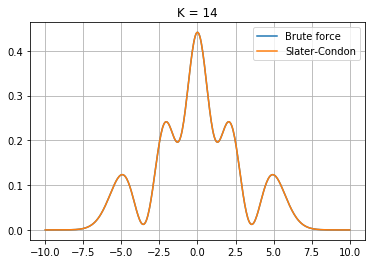

Time spent computing one-body matrix: 0.011816024780273438 sec
Time spent computing one-body matrix: 0.0027158260345458984 sec


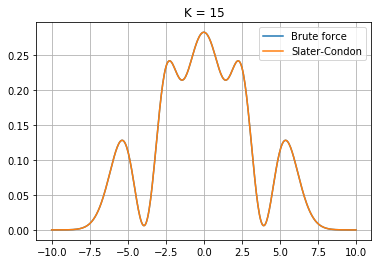

Time spent computing one-body matrix: 0.011893033981323242 sec
Time spent computing one-body matrix: 0.0026268959045410156 sec


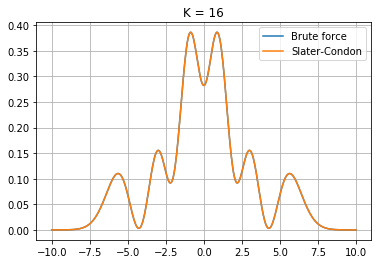

Time spent computing one-body matrix: 0.011558055877685547 sec
Time spent computing one-body matrix: 0.002732992172241211 sec


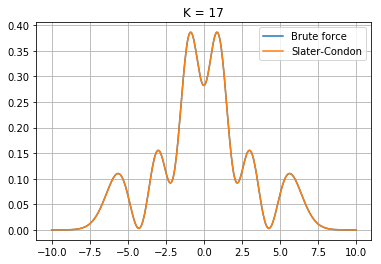

Time spent computing one-body matrix: 0.011245965957641602 sec
Time spent computing one-body matrix: 0.002626657485961914 sec


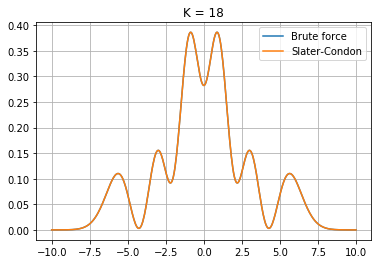

Time spent computing one-body matrix: 0.011250734329223633 sec
Time spent computing one-body matrix: 0.0027518272399902344 sec


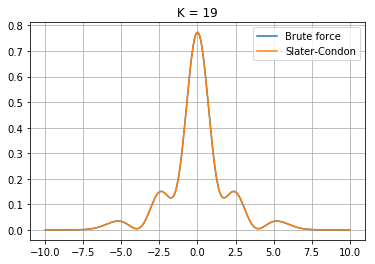

Time spent computing one-body matrix: 0.011217117309570312 sec
Time spent computing one-body matrix: 0.0039789676666259766 sec


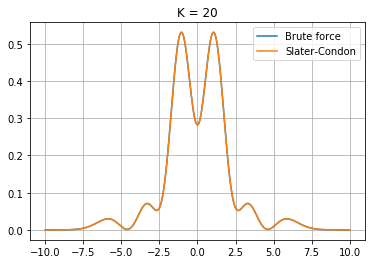

In [13]:
for K in range(len(ci_b.energies)):
    rho_b = ci_b.compute_particle_density(K=K)
    rho = ci.compute_particle_density(K=K)

    rho_b = ci_b.system.n * rho_b / np.trapz(rho_b, x=ci_b.system.grid)
    rho = ci.system.n * rho / np.trapz(rho, x=ci.system.grid)

    plt.plot(ci_b.system.grid, rho_b.real, label="Brute force")
    plt.plot(ci.system.grid, rho.real, label="Slater-Condon")
    plt.legend(loc="best")
    plt.title(f"K = {K}")
    plt.grid()
    plt.show()

    np.testing.assert_allclose(rho_b, rho)